In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
train = pd.read_csv("./data/train_numeric.csv")
train.drop('Unnamed: 0',axis=1,inplace=True)
#train = pd.read_csv("./data/training_data.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   int64  
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   int64  
 3   Dependents        5282 non-null   int64  
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   int64  
 6   MultipleLines     5282 non-null   int64  
 7   InternetService   5282 non-null   int64  
 8   OnlineSecurity    5282 non-null   int64  
 9   OnlineBackup      5282 non-null   int64  
 10  DeviceProtection  5282 non-null   int64  
 11  TechSupport       5282 non-null   int64  
 12  StreamingTV       5282 non-null   int64  
 13  StreamingMovies   5282 non-null   int64  
 14  Contract          5282 non-null   int64  
 15  PaperlessBilling  5282 non-null   int64  
 16  PaymentMethod     5282 non-null   int64  


In [5]:
yes = train.copy()
#yes = train[train["Churn"]==1]
#yes = train[train["Churn"]=="Yes"]
#yes.info()

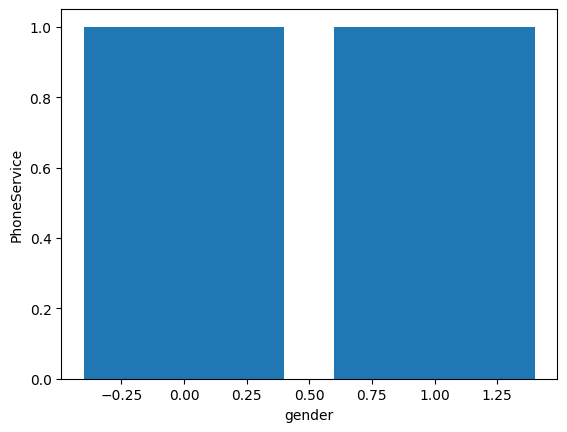

In [6]:
plt.bar(yes["gender"], yes["PhoneService"])
plt.xlabel("gender")
plt.ylabel("PhoneService")
plt.show()

In [8]:
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges','Churn']
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
#import numpy as np


# Create a set of data points
#data_points = np.random.randint(0, 100, (100, 2))

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object to the data points
kmeans.fit(yes[features])

# Get the cluster labels for the data points
cluster_labels = kmeans.labels_


yes.loc[:,"cluster_labels"] = cluster_labels


C:\Users\V84468\.virtualenvs\test_pipenv_app-x5YYi1Rf\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


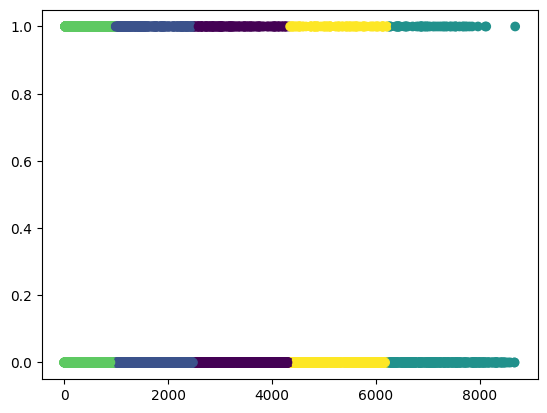

In [12]:
# Visualize the clusters
plt.scatter(yes["TotalCharges"], yes["Churn"], c=cluster_labels)
plt.show()

<Axes: >

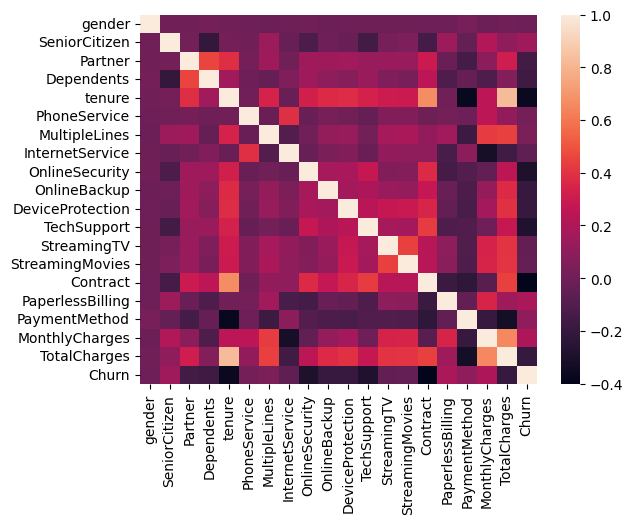

In [16]:
corr = train.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [ ]:
#correlation: contract, tenure, total charge (under the hood: online security, online backup, device protection, tech spport, streaming tv, streamingmoveis)
#not correlated: gender, senior citizen, payment method